# Final Project: Digit Recognizer - An Active Kaggle Competition
##  Name: Gopi Miyani (10437266)
### Model : Fully Connected Neural Network

- Kaggle Competition Link: https://www.kaggle.com/c/digit-recognizer/overview
- Goal: To identify digits from hand-written images


## 1. Method: Fully Connected Neural Network

### 1.1.  Load Data 

In [59]:
# Import Libraries

import numpy as np
import pandas as pd
from IPython.display import display, HTML

# Load Data

train_data=pd.read_csv('Data/train.csv')
test_data=pd.read_csv('Data/test.csv')

print('\nShape of train_data: '+str(train_data.shape))
print('Shape of test data: '+ str(test_data.shape))


Shape of train_data: (42000, 785)
Shape of test data: (28000, 784)


In [60]:
# Extract input features and labels from tarinning data into x_train and y_train

x_train = train_data.drop(labels='label',axis=1)
#print('\n------------------ x_train Data Head ------------------\n' +str(x_train.head))
#print('\n------------------y_train Data Head ------------------\n' +str(y_train.head))
y_train=train_data['label']
print('Shape of x_train: ' +str(x_train.shape))
print('Shape of y_train: ' +str(y_train.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))


Shape of x_train: (42000, 784)
Shape of y_train: (42000,)
number of classes: 10


### 1.2. Data Normalization 

In [44]:
# Normalize train and test data

x_train=x_train/255.0
test_data=test_data/255.0

#print(x_train.describe())
#print(test_data.describe())

# Reshape x_tarin and test data 
#x_train=x_train.values.reshape(-1,28,28,1)
#test_data=test_data.values.reshape(-1,28,28,1)

print('Shape of x_train' +str(x_train.shape))
print('Shape of test_data' +str(test_data.shape))

Shape of x_train(42000, 784)
Shape of test_data(28000, 784)


### 1.3. Train-Validation Split 

In [45]:
from sklearn.model_selection import train_test_split

# Train-validation split 

r_seed = 2
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=r_seed)


print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))


Shape of x_tr: (37800, 784)
Shape of y_tr: (37800,)
Shape of x_val: (4200, 784)
Shape of y_val: (4200,)


### 1.4. Build Fully Connected Neural Network

In [35]:
from keras import models
from keras import layers
d1 = 600 # width of the 1st hidden layer
d2 = 600 # width of the 2nd hidden layer
model = models.Sequential()
model.add(layers.Dense(d1, activation='relu', input_shape=(784,)))
model.add(layers.Dense(d2, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 600)               471000    
_________________________________________________________________
dense_10 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                6010      
Total params: 837,610
Trainable params: 837,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
from keras import optimizers
model.compile(optimizers.RMSprop(lr=0.0001),
loss='categorical_crossentropy',
metrics=['accuracy'])

In [37]:
#0.98 acc
history = model.fit(x_tr, y_tr,
batch_size=64, epochs=50,
validation_data=(x_val, y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/50
37800/37800 [==============================] - 8s 201us/step - loss: 0.4720 - accuracy: 0.8809 - val_loss: 0.2420 - val_accuracy: 0.9312
Epoch 2/50
37800/37800 [==============================] - 6s 171us/step - loss: 0.2006 - accuracy: 0.9426 - val_loss: 0.1892 - val_accuracy: 0.9445
Epoch 3/50
37800/37800 [==============================] - 7s 180us/step - loss: 0.1482 - accuracy: 0.9579 - val_loss: 0.1455 - val_accuracy: 0.9564
Epoch 4/50
37800/37800 [==============================] - 7s 180us/step - loss: 0.1173 - accuracy: 0.9660 - val_loss: 0.1299 - val_accuracy: 0.9598
Epoch 5/50
37800/37800 [==============================] - 6s 168us/step - loss: 0.0950 - accuracy: 0.9729 - val_loss: 0.1334 - val_accuracy: 0.9598
Epoch 6/50
37800/37800 [==============================] - 6s 171us/step - loss: 0.0782 - accuracy: 0.9771 - val_loss: 0.1074 - val_accuracy: 0.9676
Epoch 7/50
37800/37800 [==============================] - 7s 17

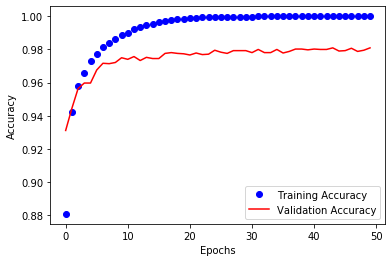

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(50) # 50 is the number of epochs
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 1.5. Compare results with simple baseline
Here, for baseline, I have used linear logistic regression model

In [50]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the training set

logreg = LogisticRegression()
logreg.fit(x_tr, y_tr)

y_val_class = logreg.predict(x_val)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [57]:
#calculate accuracy
from sklearn import metrics
print('--------------------- Comparision of Fully Connected NN with Baseline ------------------')
print('\nValidation Accuracy Score (Logistic Regression): '+str(metrics.accuracy_score(y_val, y_val_class)))
print('Validation Accuracy Score (Fully Connected NN): ' +str(history.history['val_accuracy'][49]))

--------------------- Comparision of Fully Connected NN with Baseline ------------------

Validation Accuracy Score (Logistic Regression): 0.9121428571428571
Validation Accuracy Score (Fully Connected NN): 0.9809523820877075


### 1.6. Predict labels for test data and save the results for submission


In [39]:
predicitons = model.predict(test_data)
predicitons = np.argmax(predicitons,axis = 1)
predicitons = pd.Series(predicitons,name="Label")

In [40]:
submission_results = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predicitons],axis = 1)

submission_results.to_csv("Submissions/DR_Submission_FNN_11_30_v1.csv",index=False)

### 1.7. Public Score of Kaggle Competion: 0.97614  
